In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("iver_cirrhosis.csv")
df.head(10)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
5,4427,C,Placebo,16418,F,N,N,N,N,1.9,259.000000,3.70,281.0,10396.8,188.34,178.000000,327.0,10.4,2
6,1418,C,Placebo,23011,F,Y,N,Y,N,1.3,291.000000,3.44,75.0,1082.0,85.00,195.000000,156.0,10.3,2
7,51,D,Placebo,24107,F,Y,N,Y,Y,12.6,200.000000,2.74,140.0,918.0,147.25,143.000000,150.0,11.1,3
8,2504,C,Placebo,15265,F,N,N,N,N,2.3,369.510563,3.93,24.0,1828.0,133.30,124.702128,474.0,10.9,1
9,1012,D,Placebo,22280,M,Y,N,Y,S,1.4,176.000000,3.48,210.0,516.0,96.10,55.000000,259.0,10.1,3


In [3]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [4]:
# describing the data
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [5]:
# check null values
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [6]:
df=df.drop("Age",axis=1)

In [7]:
# check duplicates

df.duplicated()
df=df.drop_duplicates()

#Data Visualization


In [8]:
s=df.query("Sex =='M'and Stage ==3")
s

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
9,1012,D,Placebo,M,Y,N,Y,S,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,259.0,10.1,3
28,460,D,D-penicillamine,M,N,Y,N,S,5.0,325.000000,3.47,110.000000,2460.000000,246.450000,56.000000,212.0,11.3,3
54,2540,D,D-penicillamine,M,Y,Y,Y,N,14.4,448.000000,3.65,34.000000,1218.000000,60.450000,318.000000,97.0,11.2,3
65,1908,C,Placebo,M,N,Y,N,N,1.5,253.000000,3.79,67.000000,1006.000000,139.500000,106.000000,360.0,11.2,3
109,1170,C,Placebo,M,Y,N,Y,S,1.3,369.510563,3.41,97.648387,1982.655769,122.556346,124.702128,259.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,552,D,Placebo,M,N,Y,N,N,2.3,178.000000,3.00,145.000000,746.000000,178.250000,122.000000,112.0,12.0,3
24321,930,D,Placebo,M,N,Y,N,N,8.0,468.000000,2.81,139.000000,2009.000000,198.400000,139.000000,335.0,10.0,3
24459,94,D,Placebo,M,Y,N,Y,S,3.1,369.510563,3.56,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,3
24959,4453,C,Placebo,M,N,Y,N,N,2.1,369.510563,3.54,122.000000,8778.000000,56.760000,124.702128,214.0,11.0,3


In [9]:
counts_value_counts = df[['Sex', 'Stage']].value_counts()


In [10]:
df['Stage'].value_counts()

2    3056
3    3029
1    2763
Name: Stage, dtype: int64

In [11]:
df['Status'].value_counts()

C     4922
D     3374
CL     552
Name: Status, dtype: int64

In [12]:
df['Sex'].value_counts()

F    7800
M    1048
Name: Sex, dtype: int64

In [13]:
data=pd.DataFrame(df)

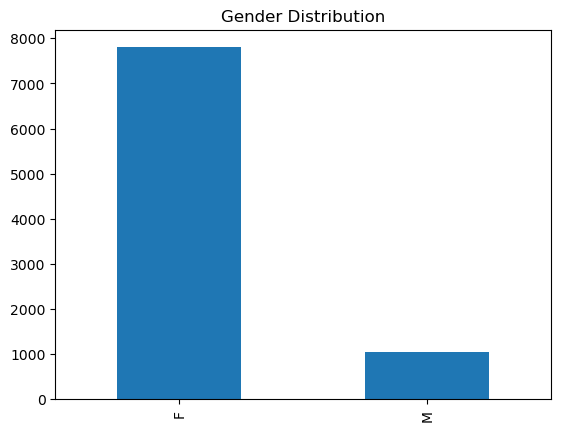

In [14]:
a=df['Sex'].value_counts()\
    .plot(kind='bar')
        
plt.title('Gender Distribution')
plt.show()

<Axes: xlabel='Status', ylabel='Cholesterol'>

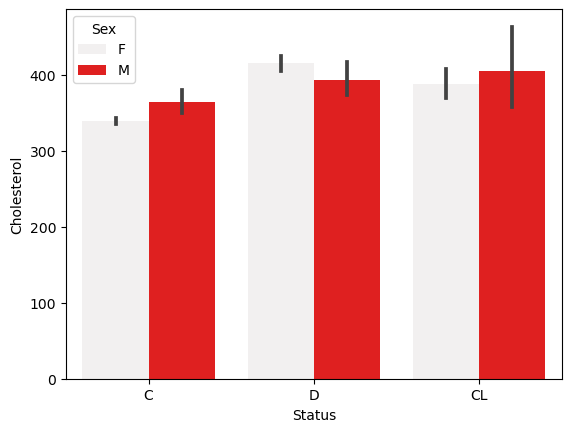

In [15]:
sns.barplot(x='Status',y='Cholesterol',hue='Sex',data=data,color='Red')

<Axes: xlabel='Sex', ylabel='Cholesterol'>

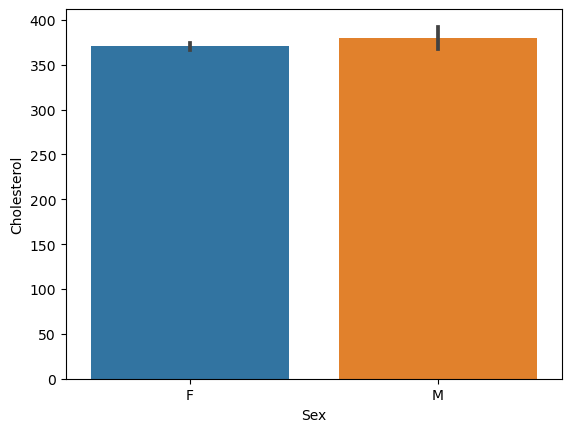

In [16]:
sns.barplot(x="Sex",y="Cholesterol",data=data)

<Axes: xlabel='Stage_Bins', ylabel='Cholesterol_Bins'>

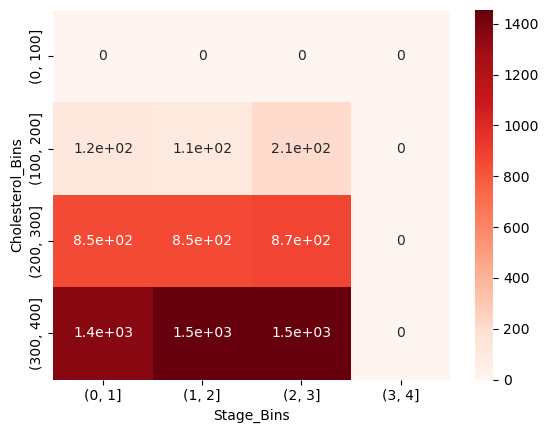

In [17]:
import numpy as np

# Create bins for 'Cholesterol' and 'Stage'
data['Cholesterol_Bins'] = pd.cut(data['Cholesterol'], bins=[0, 100, 200, 300, 400])
data['Stage_Bins'] = pd.cut(data['Stage'], bins=[0, 1, 2, 3, 4])

# Create a pivot table for the heatmap
pivot_table = data.pivot_table(index='Cholesterol_Bins', columns='Stage_Bins', values='Sex', aggfunc='count')

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, cmap='Reds')

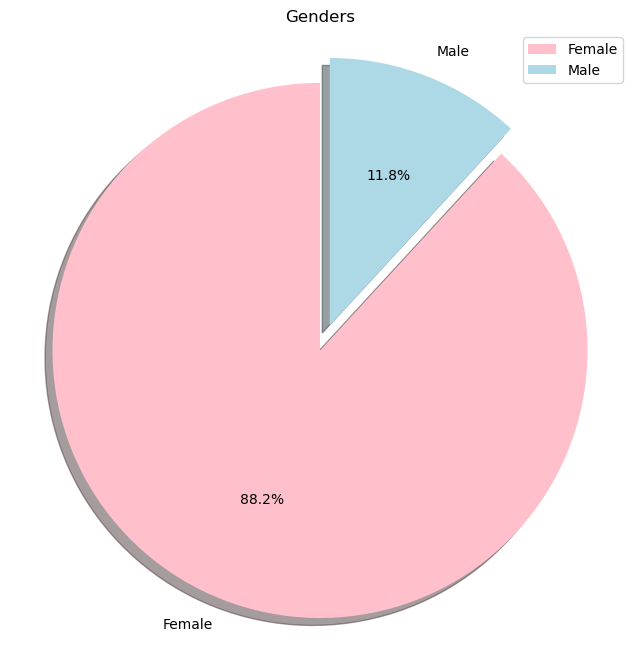

In [18]:
data=df.groupby('Sex').groups
sizes=[len(data[key]) for key in data]

explode=[0.1,0.]
labels=['Female','Male']
plt.figure(figsize=(8, 8))
plt.pie(sizes,autopct='%1.1f%%',explode=explode,labels=labels,colors=['pink','lightblue'], startangle=90,shadow=True)
plt.title('Genders')
plt.axis('equal')  
plt.legend()
plt.show()

<Axes: xlabel='Drug', ylabel='Count'>

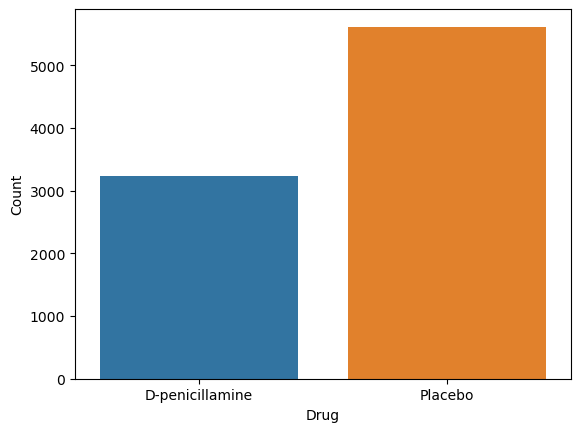

In [19]:
data = df.groupby('Drug').groups
sizes = [len(data[key]) for key in data]
labels = ['D-penicillamine', 'Placebo']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Drug': labels, 'Count': sizes})

# Create the bar plot
sns.barplot(x='Drug', y='Count', data=plot_data)

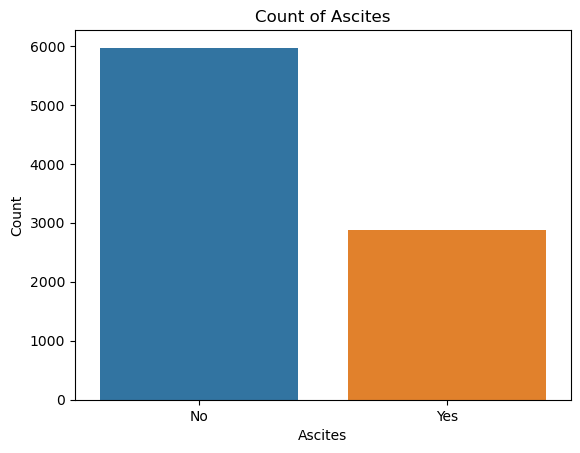

In [20]:
data = df.groupby('Ascites').groups
sizes = [len(data[key]) for key in data]
labels = ['No', 'Yes']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Ascites': labels, 'Count': sizes})

# Create the bar plot
sns.barplot(x='Ascites', y='Count', data=plot_data)
plt.title('Count of Ascites')
plt.xlabel('Ascites')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Ascites', ylabel='Counts'>

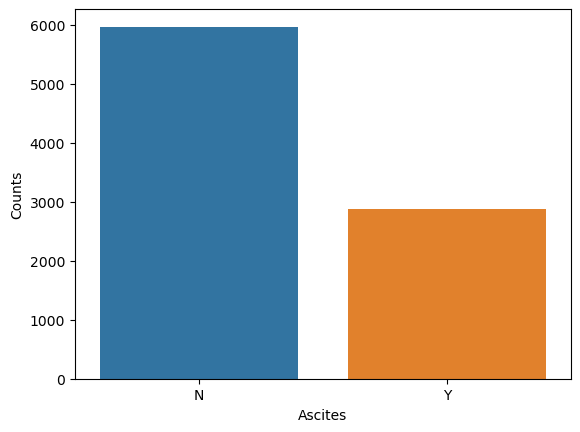

In [21]:
ascites_counts = df['Ascites'].value_counts().reset_index()
ascites_counts.columns = ['Ascites', 'Counts']

sns.barplot(x='Ascites', y='Counts', data=ascites_counts)

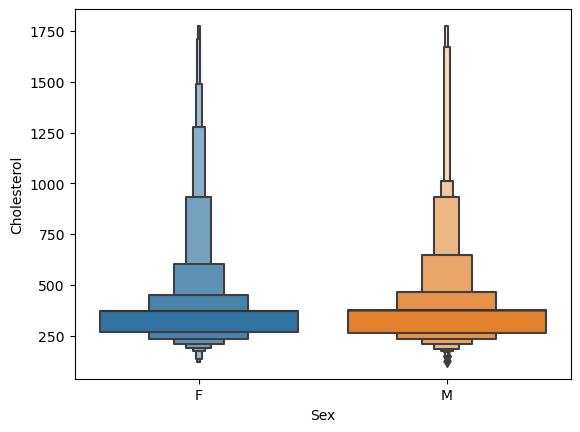

In [22]:
sns.boxenplot(y=df['Cholesterol'],x=df['Sex'])
plt.show()


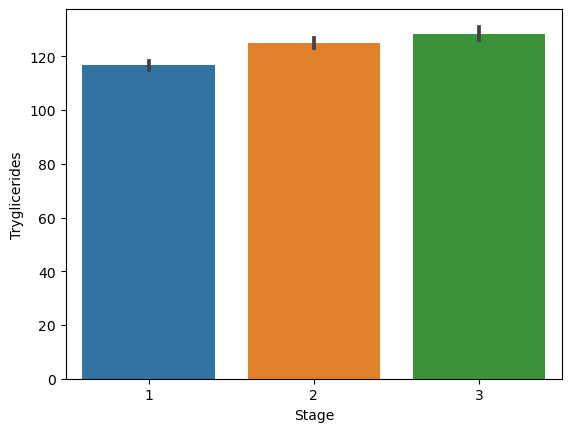

In [23]:
sns.barplot(y=df['Tryglicerides'],x=df['Stage'])
plt.show()


In [25]:
df.head()

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Cholesterol_Bins,Stage_Bins
0,2221,C,Placebo,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,"(100.0, 200.0]","(0, 1]"
1,1230,C,Placebo,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,"(200.0, 300.0]","(1, 2]"
2,4184,C,Placebo,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,"(300.0, 400.0]","(1, 2]"
3,2090,D,Placebo,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,"(200.0, 300.0]","(1, 2]"
4,2105,D,Placebo,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,NaN,"(0, 1]"


Building model

In [26]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage',
       'Cholesterol_Bins', 'Stage_Bins'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
columntotransform=['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Bilirubin']

for x in columntotransform:
    df[x]=lb.fit_transform(df[x])

In [28]:
#
x=df.iloc[:,1:17]
y=df.iloc[:,17]


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [30]:

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [32]:

# Predicting the test set result
y_pred= classifier.predict(x_test)


print("------------PREDICTION----------")
df2=pd.DataFrame({"Actual Result-Y":y_test,"Prediction Result":y_pred})
df2

------------PREDICTION----------


,Actual Result-Y,Prediction Result
8379,3,3
14456,2,3
21632,3,3
276,2,2
12042,3,3
...,...,...
1079,1,2
5227,3,3
3072,3,3
820,1,1


In [33]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Mean Absolute Error: 0.2613019891500904
Mean Squared Error: 0.3399638336347197
Root Mean Squared Error: 0.5830641762573994
Accuracy: 77.80
